# Ford GoBike System Data
## by Mohammed

## Investigation Overview

In this dataset the investigation in the begining was really diffcult . . new kinds of data for me I have to understand like latitude and longitude for distance measurements what the important features I could discuss and compare. The investigation was depending on the most trip taken in this dataset and comparing the user types with many factors.

## Dataset Overview

Ford GoBike System Data contain informations about GoBike system which store the information for each bike used in trips like the distance and the start and end time of the trip also the name of stations destination.<br>
There are 94802 records in the dataset with 14 features ( duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name	end_station_latitude, end_station_longitude, bike_id, user_type and bike_share_for_all_trip).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe

os.chdir("/Users/m7md/Data Analysis/Project 5/Communicate Finding Project/Data")

df = pd.read_csv('GoBike.csv')

top_5_trips = df.sort_values(by=['duration_sec']).tail(5)

## Most trips taken in GoBike January 2018

Most trips taken with durations between 84 thousand to 86 thousand approximately

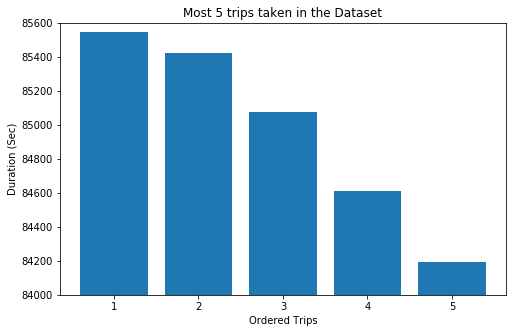

In [4]:
# resize the plot
plt.figure(figsize=[8, 5])

# Using matplotlib plot Bar chart
plt.bar([ 5, 4,3,2,1] , top_5_trips.duration_sec)

# Enhance the plot
plt.ylim([84000,85600])
plt.xlabel('Ordered Trips')
plt.ylabel('Duration (Sec)')
plt.title('Most 5 trips taken in the Dataset')

# Show the plot
plt.show()

## Duration VS Distance

most of trips duration are between 300 to 1 thousand as previous result from the another visualization ***but as it shows maybe reach to 10 thousand approximately as nearly number for the most trips duration based on distance.***

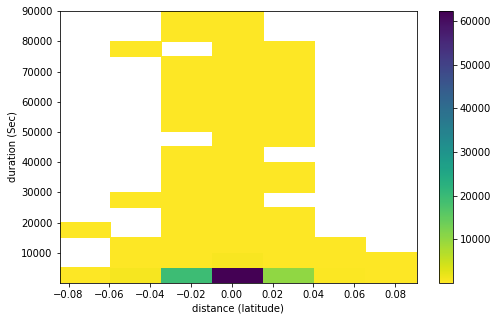

In [5]:
binsize_y = np.arange (61 , 85546 + 5000 , 5000 )
binsize_x = np.arange ( -0.084410 ,  0.072883 + 0.025 , 0.025 )

# resize the plot
plt.figure(figsize = [8, 5])

# Using matplotlib plot heatmap
plt.hist2d(data = df , x = 'distance' , y = 'duration_sec' , cmin= 0.5 , cmap = 'viridis_r' , bins = [binsize_x , binsize_y] );

# Enhance the plot
plt.colorbar()
plt.xlabel('distance (latitude)')
plt.ylabel('duration (Sec)')

# Show the plot
plt.show()

## User types quantity

The Subscribers represents 87 percent of the users in the GoBike ford system data. The subscribers approximatly are 8 times of the customers that's huge number. 

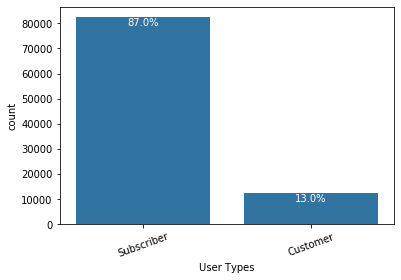

In [6]:
# Create Bar chart with provide important information
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'user_type', color = base_color)
plt.xticks(rotation = 20)
plt.xlabel('User Types')

# for addining notations
number_users = df.shape[0]
userTypes = df.user_type.value_counts()
locs, labels = plt.xticks() 

for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = userTypes[label.get_text()]
    percentage_string = '{:0.1f}%'.format(100*count/number_users)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, percentage_string, ha = 'center', color = 'w' , va = 'top')


plt.show()

## Bike Share Subscribition Based on User type

Only the subscribers who use Bike Share which I guess it means only the subscribers could benefit from this offer of subscribition. All of the Customers not using Bike Share

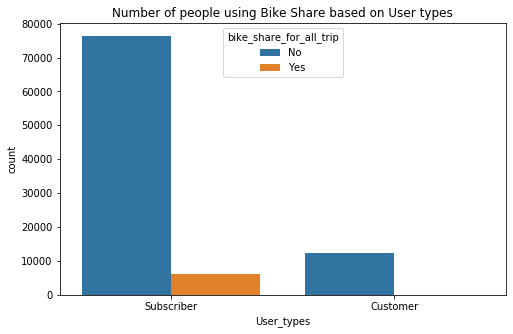

In [7]:
# resize the plot
plt.figure(figsize=[8, 5])

# Using seaborn plot clustred bar chart
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip');

# Enhance the plot
plt.title('Number of people using Bike Share based on User types')
plt.xlabel('User_types')

# Show the plot
plt.show()

## Duration Based on User type

The Customers have higher duration values than the Subcribers even though when the Subscribers are greater number as a quantity.

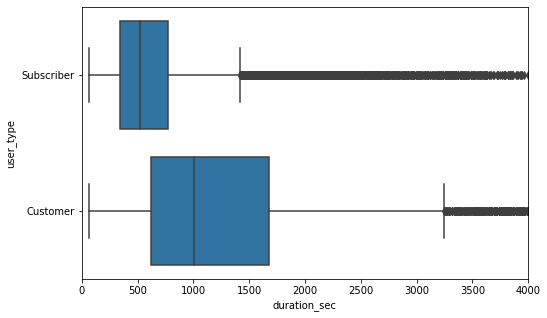

In [8]:
plt.figure(figsize = [8, 5])

base_color = sb.color_palette()[0]
sb.boxplot(data = df, y = 'user_type', x = 'duration_sec', color = base_color );
plt.xlim([0 , 4000]) 

plt.show()

## Duration VS Distance based on User type

assures the Customers have higher distance and duration.

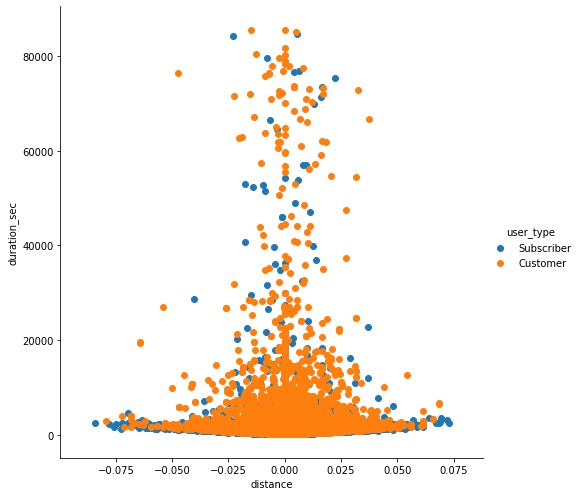

In [9]:
g = sb.FacetGrid(data = df, hue = 'user_type', size = 7 )
g.map(plt.scatter, 'distance', 'duration_sec' )
g.add_legend()

plt.show()